In [61]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


In [62]:
train=pd.read_csv("/Users/bruce/Desktop/datasets/iris/iris.csv")

In [63]:
train.head(5)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [64]:
species = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
levels = range(len(species))
dict_levels = dict(zip(species, levels))
for v in species:
    train.loc[train['species'] == v, 'species'] = dict_levels[v]

In [65]:
train.head(5)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [66]:
train.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


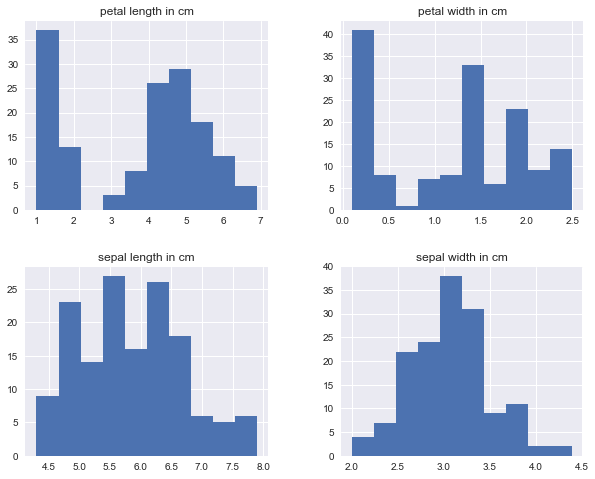

In [67]:
train.hist(figsize=(10,8))
plt.show()

In [68]:
train.isnull().sum()

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
species               0
dtype: int64

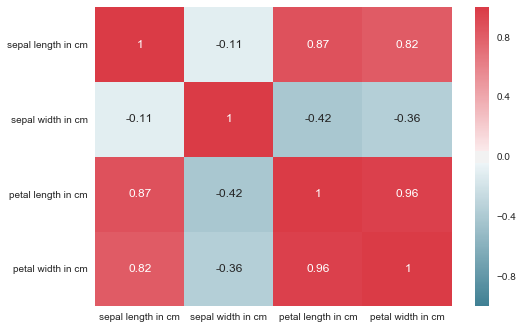

In [69]:
corr=train[train.columns].corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap,annot=True)
sns.plt.show()

In [73]:
features=train.drop("species",axis=1)
outcomes=train["species"].values
features.head(5)


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [74]:
for i in features.columns: 
    scaler = preprocessing.StandardScaler()
    train[i] = scaler.fit_transform(train[i])

/Users/bruce/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/bruce/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/bruce/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your 

In [75]:
train.head(5)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, outcomes, test_size=0.25, random_state=10)

In [80]:
Y_train

array([2, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0,
       0, 2, 1, 2, 0, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1,
       0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2,
       0, 1, 2, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 1, 0, 2, 0], dtype=object)

# Random forest

In [77]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [82]:
model=RandomForestClassifier(n_estimators=5)
kfold = KFold(n_splits=10, random_state=0)
cv_result = cross_val_score(model,X_train.values, Y_train.astype(int), cv = kfold,scoring = "accuracy")
results=["Ranom Forest",cv_result.mean(),cv_result.std()]

print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[0] , results[1] * 100, results[2] * 100))

Ranom Forest         94.62 (+/-) 7.24 


In [14]:
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
paramaters = [
             {'n_estimators' : [100, 200, 300, 500, 1000], 
              'max_features' : ['auto','log2',None],
              'max_depth':[3,4,5],
              'bootstrap':[True,False]
             }                                       
             ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train,Y_train)
best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )



('Best accuracy : ', 0.9375)
('Best parameters :', {'max_features': 'auto', 'n_estimators': 100, 'bootstrap': True, 'max_depth': 3})


In [92]:
final_model = RandomForestClassifier(n_estimators=100,max_features='auto',bootstrap=True,oob_score=True,max_depth=3)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[11  0  0]
 [ 0 15  0]
 [ 0  0 12]]
100.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      1.00      1.00        15
          2       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        38



In [93]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Activation, Dropout
from keras import optimizers

In [94]:
m = Sequential()
m.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
m.add(Dropout(0.5))
m.add(Dense(128, activation='relu'))
m.add(Dropout(0.5))
m.add(Dense(128, activation='relu'))
m.add(Dropout(0.5))
m.add(Dense(len(np.unique(Y_train)), activation='softmax'))
    
m.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [95]:
m.fit(
    # Feature matrix
    X_train.values, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.1,
    batch_size=256, 
)

Train on 100 samples, validate on 12 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 1.05247, saving model to best.model
0s - loss: 1.1632 - acc: 0.3500 - val_loss: 1.0525 - val_acc: 0.5000
Epoch 2/200
Epoch 00001: val_loss improved from 1.05247 to 1.00845, saving model to best.model
0s - loss: 1.1263 - acc: 0.2800 - val_loss: 1.0084 - val_acc: 0.7500
Epoch 3/200
Epoch 00002: val_loss improved from 1.00845 to 0.96667, saving model to best.model
0s - loss: 1.0827 - acc: 0.4300 - val_loss: 0.9667 - val_acc: 0.8333
Epoch 4/200
Epoch 00003: val_loss improved from 0.96667 to 0.92570, saving model to best.model
0s - loss: 0.9934 - acc: 0.5600 - val_loss: 0.9257 - val_acc: 0.8333
Epoch 5/200
Epoch 00004: val_loss improved from 0.92570 to 0.88580, saving model to best.model
0s - loss: 0.9977 - acc: 0.5200 - val_loss: 0.8858 - val_acc: 0.8333
Epoch 6/200
Epoch 00005: val_loss improved from 0.88580 to 0.84725, saving model to best.model
0s - loss: 0.9716 - acc: 0.5700 - val_loss: 

In [96]:
m.load_weights("best.model")

In [102]:
mapping = (
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
)
y_pred_nn = [mapping[pred] for pred in m.predict(X_test.values).argmax(axis=1)]

In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred_nn)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred_nn) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred_nn)
print(report)

[[11  0  0]
 [ 0 15  0]
 [ 0  0 12]]
100.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      1.00      1.00        15
          2       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        38

